# CRISP-DM Process for AirBnB Boston Data Set

This notebook explores the AirBnB Boston data set from Kaggle: https://www.kaggle.com/airbnb/boston

This notebook follows the CRISP-DM process:

## 1. Business Understanding

We will explore the following data questions from this dataset.
- **Question 1:** What is the busiest period in Boston? Also when is the good time for prople to visit in terms of cost of rooms?
    
    **Reason:** This insight helps the customers to determine the period in which it is costly to visit the area and the **business owners to plan the business in this time period**. 
    
    
- **Question 2:** What are the 4 features that affect the pricing of the rooms the most?
    
    **Reason:** This insight helps the customers to decide which features cost them more, and helps the business owners to decide which features to include and what price to charge to do better in the market.
    
    
- **Question 3:** What are the most expensive zipcodes in Boston?
    
    **Reason:** This is also an important factor to determine the areas to expand the business to make more profit.

Now that we have defined the buisiness questions that we are interested to answer, let us go to the next stage "Data Exploration"

## 1. Data Understanding


In [1]:
# import all the necessary modules
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the data

#folder = r'boston'

calendar_file = 'calendar.csv'
listings_file = 'listings.csv'
reviews_file = 'reviews.csv'

calendar_df = pd.read_csv(calendar_file)
listings_df = pd.read_csv(listings_file)
reviews_df = pd.read_csv(reviews_file)

In [4]:
listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
reviews_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
# Calendar data
calendar_df.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


I would like to pause here and talk about the data of the **calendar.csv**. It can be seen that the most interesting column here is **"available"**. It is driving factor for the price column which is the column we are interested in this notebook.

Let us look more deeply into the calendar data.

In [7]:
# check the available column in calendar data
calendar_df['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

From the above data it is getting clearer that if the **available** data is "t" or true then the rooms are available else are unavailable. It will be easier to handle the data further if we convert the t and f data to 0 and 1 since it has only 2 classes.

In [8]:
calendar_df["available"].replace({"f": 0, "t": 1}, inplace=True)
calendar_df.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


From the above data the date column is of different format and type other than accepted by the pandas for analysis(datetime). So we will transform the date column.

In [9]:
# transform time data
calendar_df['date']= pd.to_datetime(calendar_df['date'])


In [10]:
#time series
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day
calendar_df['dayofweek'] = calendar_df['date'].dt.dayofweek



Now that the date is split and processsed to the required format, we can go to the price column, which has some inconsistencies. So the following preprocessing is done. Top 30 values of the availablity 1 is printed

In [11]:
# transform and preprocess the 'price' column
calendar_df['price'] = calendar_df['price'].str.replace('$','')
calendar_df['price'] = calendar_df['price'].str.replace(',','')
calendar_df['price'] = pd.to_numeric(calendar_df['price'])
calendar_df[calendar_df['available']==1].head(30)

,listing_id,date,available,price,year,month,day,dayofweek
365,3075044,2017-08-22,1,65.0,2017,8,22,1
366,3075044,2017-08-21,1,65.0,2017,8,21,0
367,3075044,2017-08-20,1,65.0,2017,8,20,6
368,3075044,2017-08-19,1,75.0,2017,8,19,5
369,3075044,2017-08-18,1,75.0,2017,8,18,4
370,3075044,2017-08-17,1,65.0,2017,8,17,3
371,3075044,2017-08-16,1,65.0,2017,8,16,2
372,3075044,2017-08-15,1,65.0,2017,8,15,1
373,3075044,2017-08-14,1,65.0,2017,8,14,0
374,3075044,2017-08-13,1,65.0,2017,8,13,6


Now that the data is preprocessed we can try to answer the first question.

### Question1: What is the busiest period in Boston? Also when is the good time for prople to visit in terms of cost of rooms?

Text(0.5,1,'Vacancy vs Month')

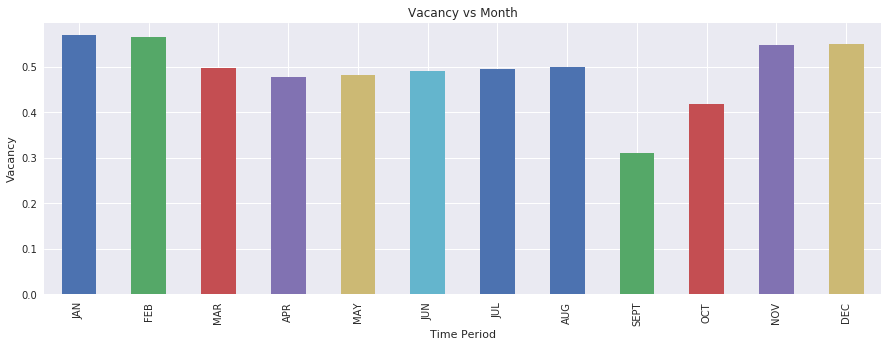

In [12]:
sns.set()
plt.figure(figsize=(15,5))
#plt.subplot(121)
calendar_df.groupby('month')['available'].mean().plot(kind='bar')
plt.xticks(np.arange(12), ['JAN', 'FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEPT','OCT','NOV','DEC'])
plt.xlabel('Time Period')
plt.ylabel('Vacancy')
plt.title('Vacancy vs Month')



From the above plot we can come into the following conclusions

* From **Vacancy vs Month** plot we can see that during **September** month the vacancies are quite less when compared to other    months.


* An interesting trend is during the winter November to January it is clear that the vacancies are more than 0.5. This means that Boston is not that busy during winter when compared to other months in spring and summer.


* So the general trend that can be observed that Boston will be less busy during the months of JAN and FEB then becomes progressively busier over the following months comming to a peak during SEPT and OCT and becoming less busy again during NOV and DEC.

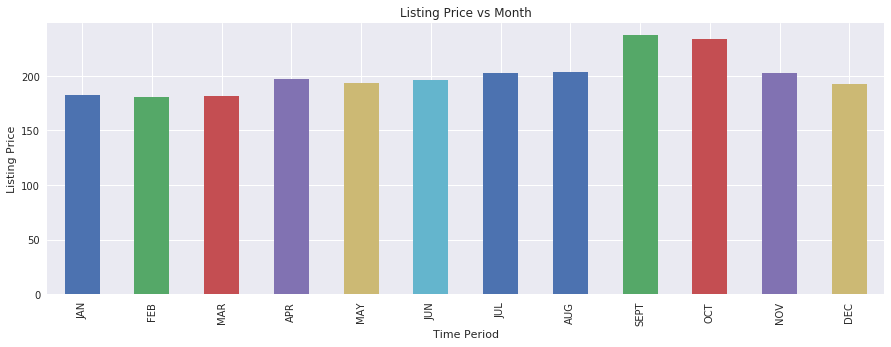

In [13]:

# plot the average listing price
plt.figure(figsize=(15,5))
calendar_df.groupby('month')['price'].mean().plot(kind='bar')
plt.xticks(np.arange(12), ['JAN', 'FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEPT','OCT','NOV','DEC'])
plt.xlabel('Time Period')
plt.ylabel('Listing Price')
plt.title('Listing Price vs Month')
plt.show()

Now comming to price as expected the price is more during the month of SEPT and OCT months, due to less availability of the rooms to stay. Also it is cheapest during the winter.


**Summary:** So to summarize the above and answer our first question?

* The busiest months in Boston are **SEPTEMBER** and **OCTOBER**.
* The best time to visit Boston in terms of price is during the months **NOVEMBER, dECEMBER, JANUARY, FEBRUARY**.



Now that we have answered the first question, we will go to the second question.

### Question 2: What are 4 features that affect the pricing of the rooms the most?

Now lets explore the listings data. This data is needed for the feature-price correlation.

In [14]:
prices = listings_df['price'].map(lambda p: int(p[1:-3].replace(",", "")))
prices.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [15]:
listings_df['price'] = prices



Now lets understand the important features: 

**1. Neighbourhood**: As per common sense the neighbourhood is an important aspect of any room or rental property. Let us explore that using the **box plot** to understand the data distribution. This is done because the mean of the price would not give a clear picture of the price distribution.

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  new_data = self.loc[res]


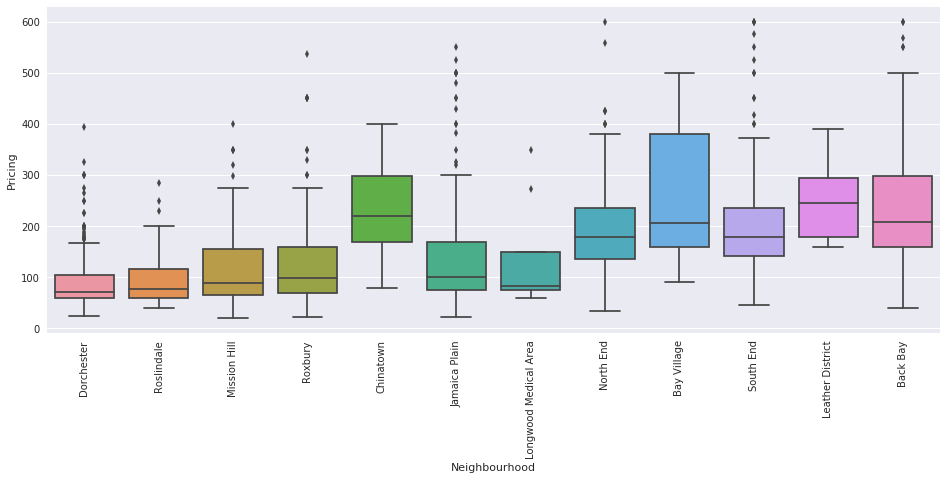

In [16]:
sort_order = listings_df.query('price')\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=True)\
                    .index
plt.figure(figsize=(16, 6))
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings_df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
plt.xlabel("Neighbourhood")
plt.ylabel("Pricing")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.show()

Its clear that the price is highest in the **Leather District** with the highest median price and the median price is higher than highest price of some of the neighbourhoods. So we can see a large price relationship with the Neighbourhood.

**Note: I have ignored the outliers as they are just few unusual cases like reputation of the rental property/room owner etc, which is beyond the scope for this article**



**2. Property type:** Its a common knowledge that the boathouses are really costly to buy and maintain. Also villas cost more than a studio apartment. So there seems to be a lot of correlation to the price here. Lets explore this aspect.

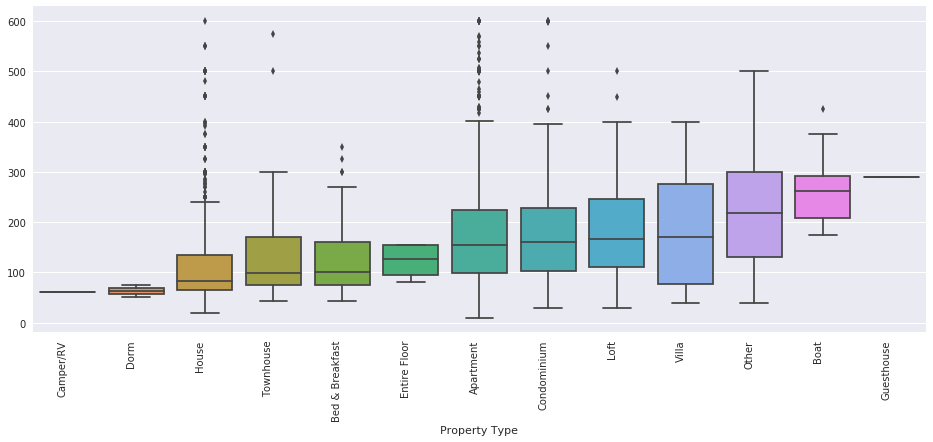

In [17]:
sort_order = listings_df.query('price<=1000')\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=True)\
                    .index
plt.figure(figsize=(16, 6))
sns.boxplot(y='price', x='property_type', data=listings_df.query('price <= 600'), order=sort_order)
plt.xlabel("Property Type")
plt.ylabel("")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

From the above it is clear that the guesthoust clearly has highest with least amount of distribution. So if we look at the property with some variation in prices, boat-houses are costliest with median price greater than highest price of other property types.



**3.Bed Type:** Now lets look at the bed type and its correlation with price. Obviously a customer would pay more for the bed than the couch. So its a relevant feature.

Text(0,0.5,'Pricing')

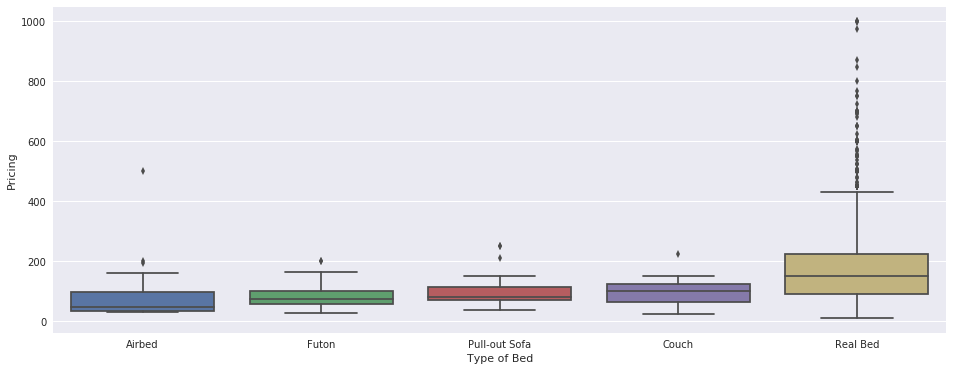

In [18]:
sort_order = listings_df.query('price <= 500')\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=True)\
                    .index
plt.figure(figsize=(16, 6))
sns.boxplot(y='price', x='bed_type', data=listings_df.query('price <= 1000'), order=sort_order)

plt.xlabel("Type of Bed")
plt.ylabel("Pricing")

As expected the Bed type also has a large correlation with the price with the **"Real Bed"** costing most.


**4. Room Type:** As we will observe the room type also has the correlation to the price.

Text(0,0.5,'Pricing')

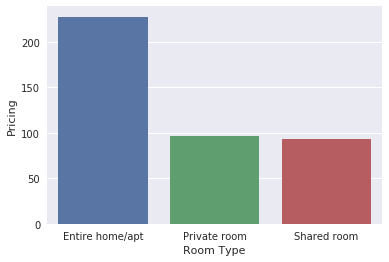

In [27]:
price_room_type = listings_df.groupby('room_type').mean()[['price']]
price_room_type.reset_index(inplace=True)
sns.barplot(x='room_type',y='price',data=price_room_type.sort_values(by='price', ascending=False))
plt.xlabel("Room Type")
plt.ylabel("Pricing")

As can be seen from above bar graph, it is clear that the pricing is affected by the Room type, with the Entire home/apt costing more than double the provate room or shared rooms.


#### Summary:
The four factors that affect the procing of a rental property are:
* Neighbourhood
* Property Type
* Room Type
* Bed Type

### Question 3: What are the most expensive zipcodes in Boston?

This is the consumer friendly question. Here we will explore the most expensive areas in Boston.

In [37]:
listings_df[(listings_df['price'] >= 1300)].zipcode

793     02118
1022    02118
1950    02114
2204    02115
2285    02215
3055    02210
Name: zipcode, dtype: object

In [38]:
mean = np.mean(listings_df['price'])
percentile = np.percentile(listings_df['price'], 99)
y = listings_df[(listings_df['price'] > percentile) ][['price', 'zipcode']]

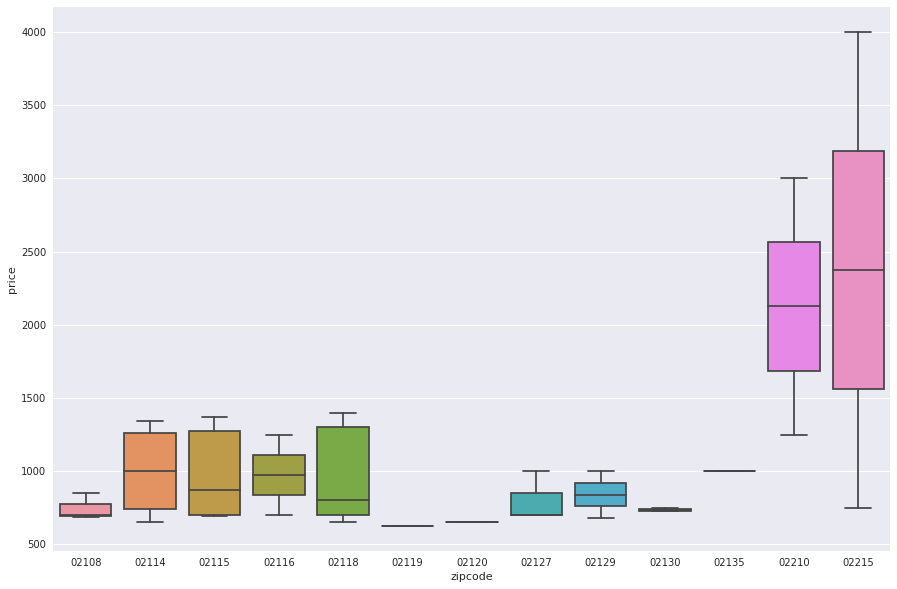

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(y.zipcode, y.price);

**Summary:** To summarize the most expensive zipcode is **02215**.


## Conclusion:


To conclude we have explored the data to answer 3 of our business questions. No machine learning was applied but the beautiful 
Seaborn visualization of the data. Now the ML model can be built to predict the prices and give more insights. But it is beyond the scope at this point